In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import pandas as pd

from itertools import combinations
from nxviz import ArcPlot
from nxviz import CircosPlot
from nxviz import MatrixPlot
from hiveplot import HivePlot


warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('data/ucidata-zachary/out.ucidata-zachary', skiprows=2, header=None, sep=' ')
df.columns = ['member1', 'member2']
G = nx.from_pandas_edgelist(df, source='member1', target='member2')
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


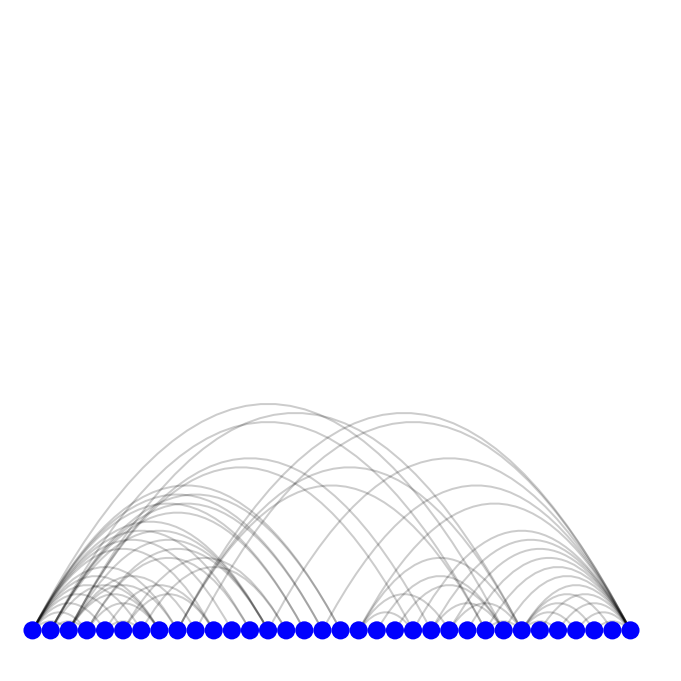

In [3]:
a = ArcPlot(G)
a.draw()

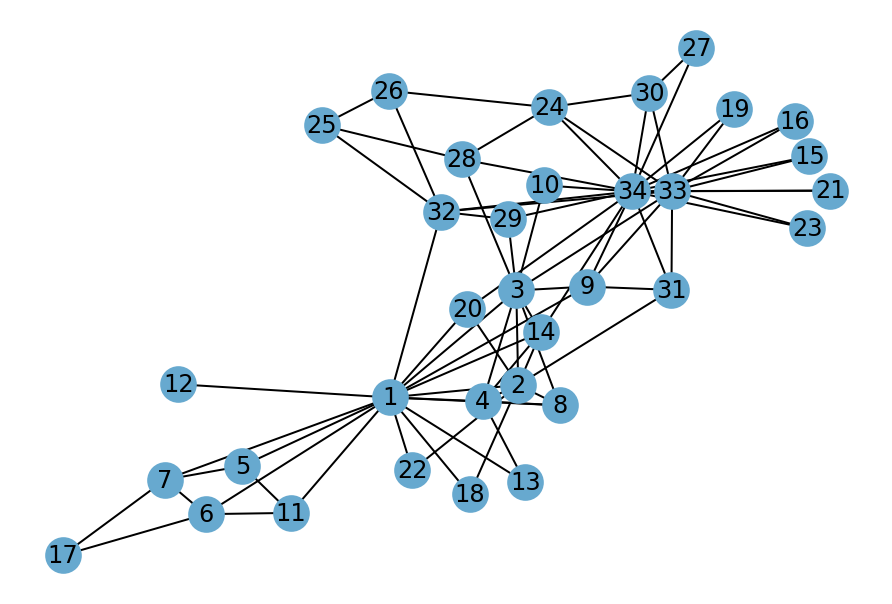

In [25]:
nx.draw_spring(G , with_labels=True , node_color='#67a9cf')

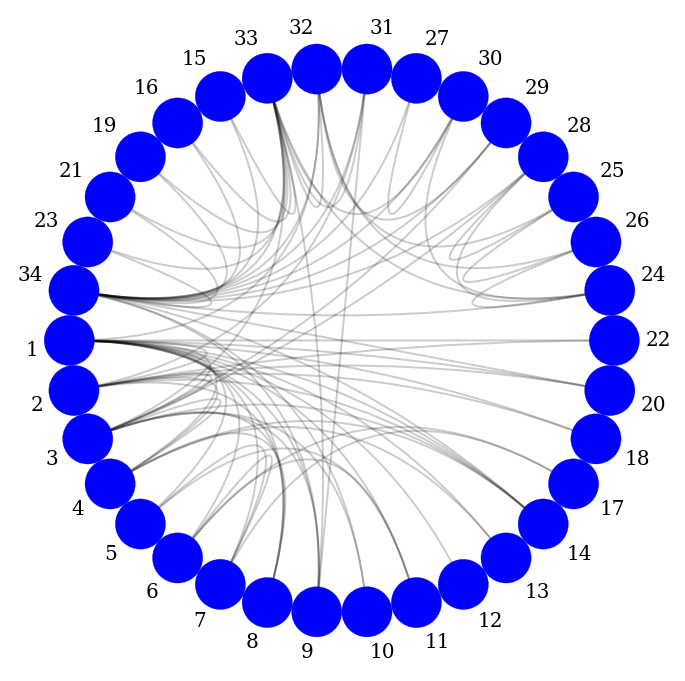

In [26]:
c = CircosPlot(G , node_labels=True)
c.draw()

#### Community detection in Networks
A network is said to have community structure if the nodes of the network can be easily grouped into (potentially overlapping) sets of nodes such that each set of nodes is densely connected internally.

We will use louvain community detection algorithm to find the modules in our graph.

In [43]:
# pip install python-louvain
import community

partition = community.best_partition(G)
partition

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 1,
 6: 1,
 7: 1,
 8: 0,
 9: 2,
 10: 2,
 11: 1,
 12: 0,
 13: 0,
 14: 0,
 17: 1,
 18: 0,
 20: 0,
 22: 0,
 24: 3,
 26: 3,
 25: 3,
 28: 3,
 29: 3,
 30: 2,
 27: 2,
 31: 2,
 32: 3,
 33: 2,
 15: 2,
 16: 2,
 19: 2,
 21: 2,
 23: 2,
 34: 2}

In [101]:
sub0 = []
for n in partition:
    if partition[n] == 0 or partition[n] == 1:
        sub0.append(n)
        
sub1 = []
for n in partition:
    if partition[n] == 2 or partition[n] == 3:
        sub1.append(n)

In [102]:
commsubgraphs = [G.subgraph(sub0), G.subgraph(sub1)]
commsubgraphs

In [105]:
for i, g in enumerate(commsubgraphs):
    for n in g.nodes():
        G.nodes[n]['subgraph'] = i
        
list(G.nodes(data=True))[6:10]

[(7, {'subgraph': 0}),
 (8, {'subgraph': 0}),
 (9, {'subgraph': 1}),
 (10, {'subgraph': 1})]

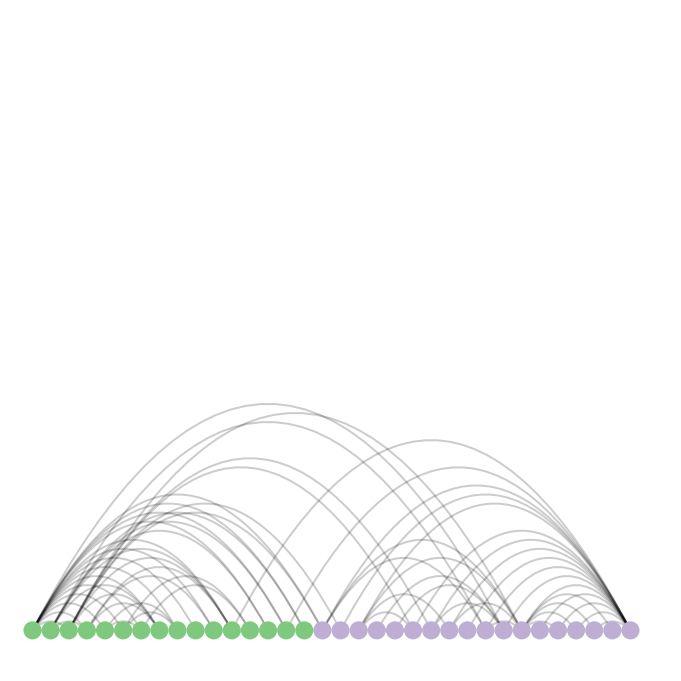

In [113]:
a = ArcPlot(G, node_color='subgraph', node_order='subgraph')
a.draw()

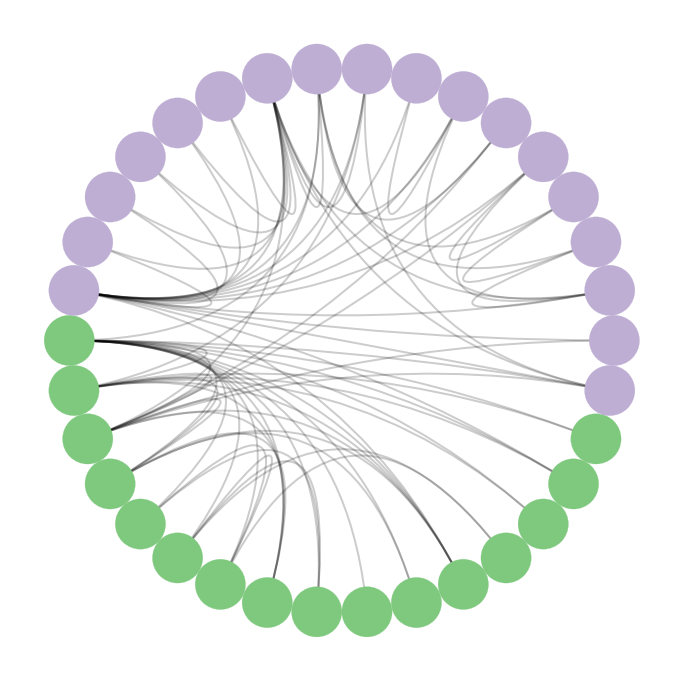

In [115]:
c = CircosPlot(G, node_color='subgraph', node_order='subgraph')
c.draw()

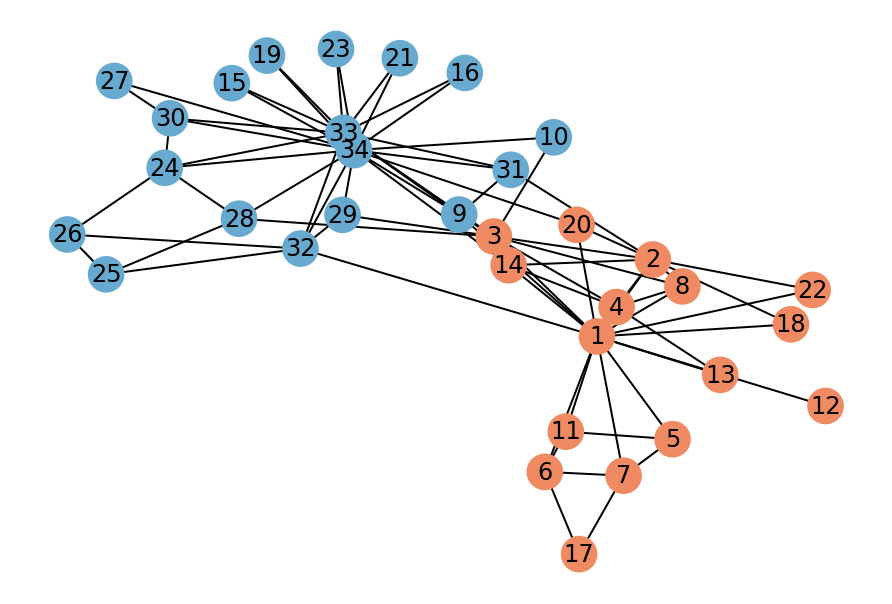

In [110]:
color_map = []
for node in G:
    if G.nodes[node]['subgraph'] == 0:
        color_map.append('#ef8a62')
    else: 
        color_map.append('#67a9cf')      

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [120]:
from hiveplot import HivePlot

nodes = dict()
nodes['0'] = [n for n,d in G.nodes(data=True) if d['subgraph'] == 0]
nodes['1'] = [n for n,d in G.nodes(data=True) if d['subgraph'] == 1]

edges = dict()
edges['group1'] = G.edges(data=True)

nodes_cmap = dict()
nodes_cmap['0'] = '#ef8a62'
nodes_cmap['1'] = '#67a9cf'

edges_cmap = dict()
edges_cmap['group1'] = 'black'

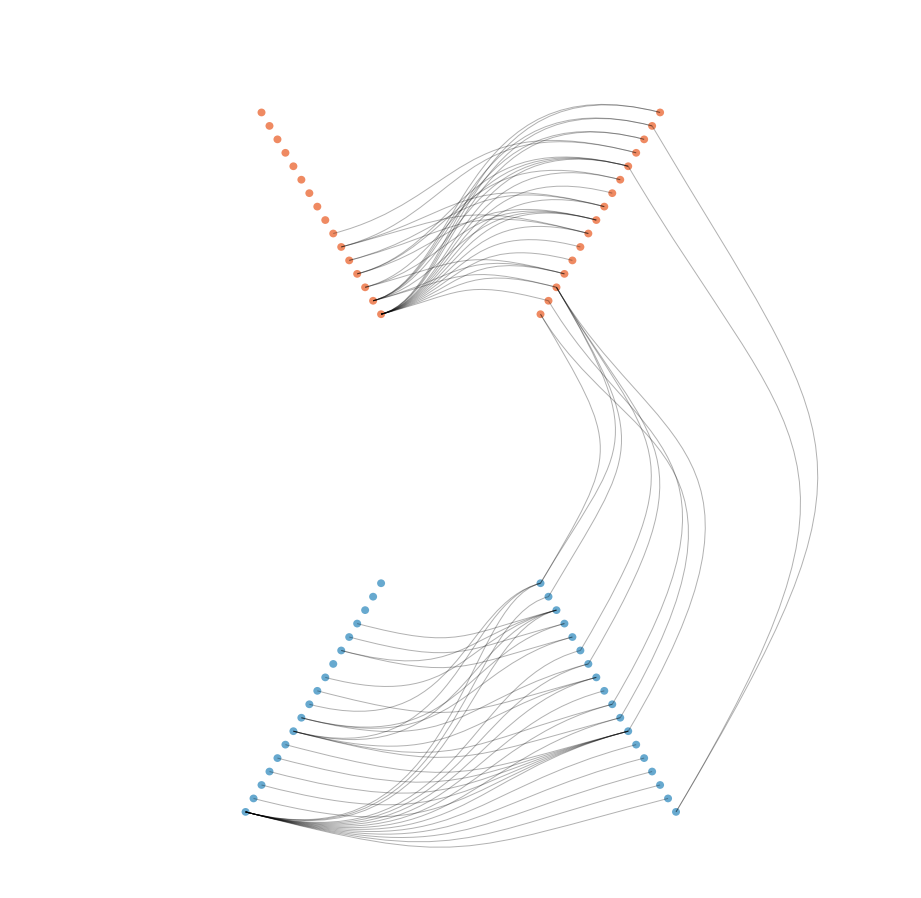

In [121]:
h = HivePlot(nodes, edges, nodes_cmap, edges_cmap)
h.draw()